# HOUSE PRICE PREDICTION

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,NaN,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing['RM'].value_counts()

6.405    3
6.167    3
6.229    3
6.417    3
5.713    3
        ..
6.546    1
5.859    1
6.416    1
5.572    1
6.976    1
Name: RM, Length: 442, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284904,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705499,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

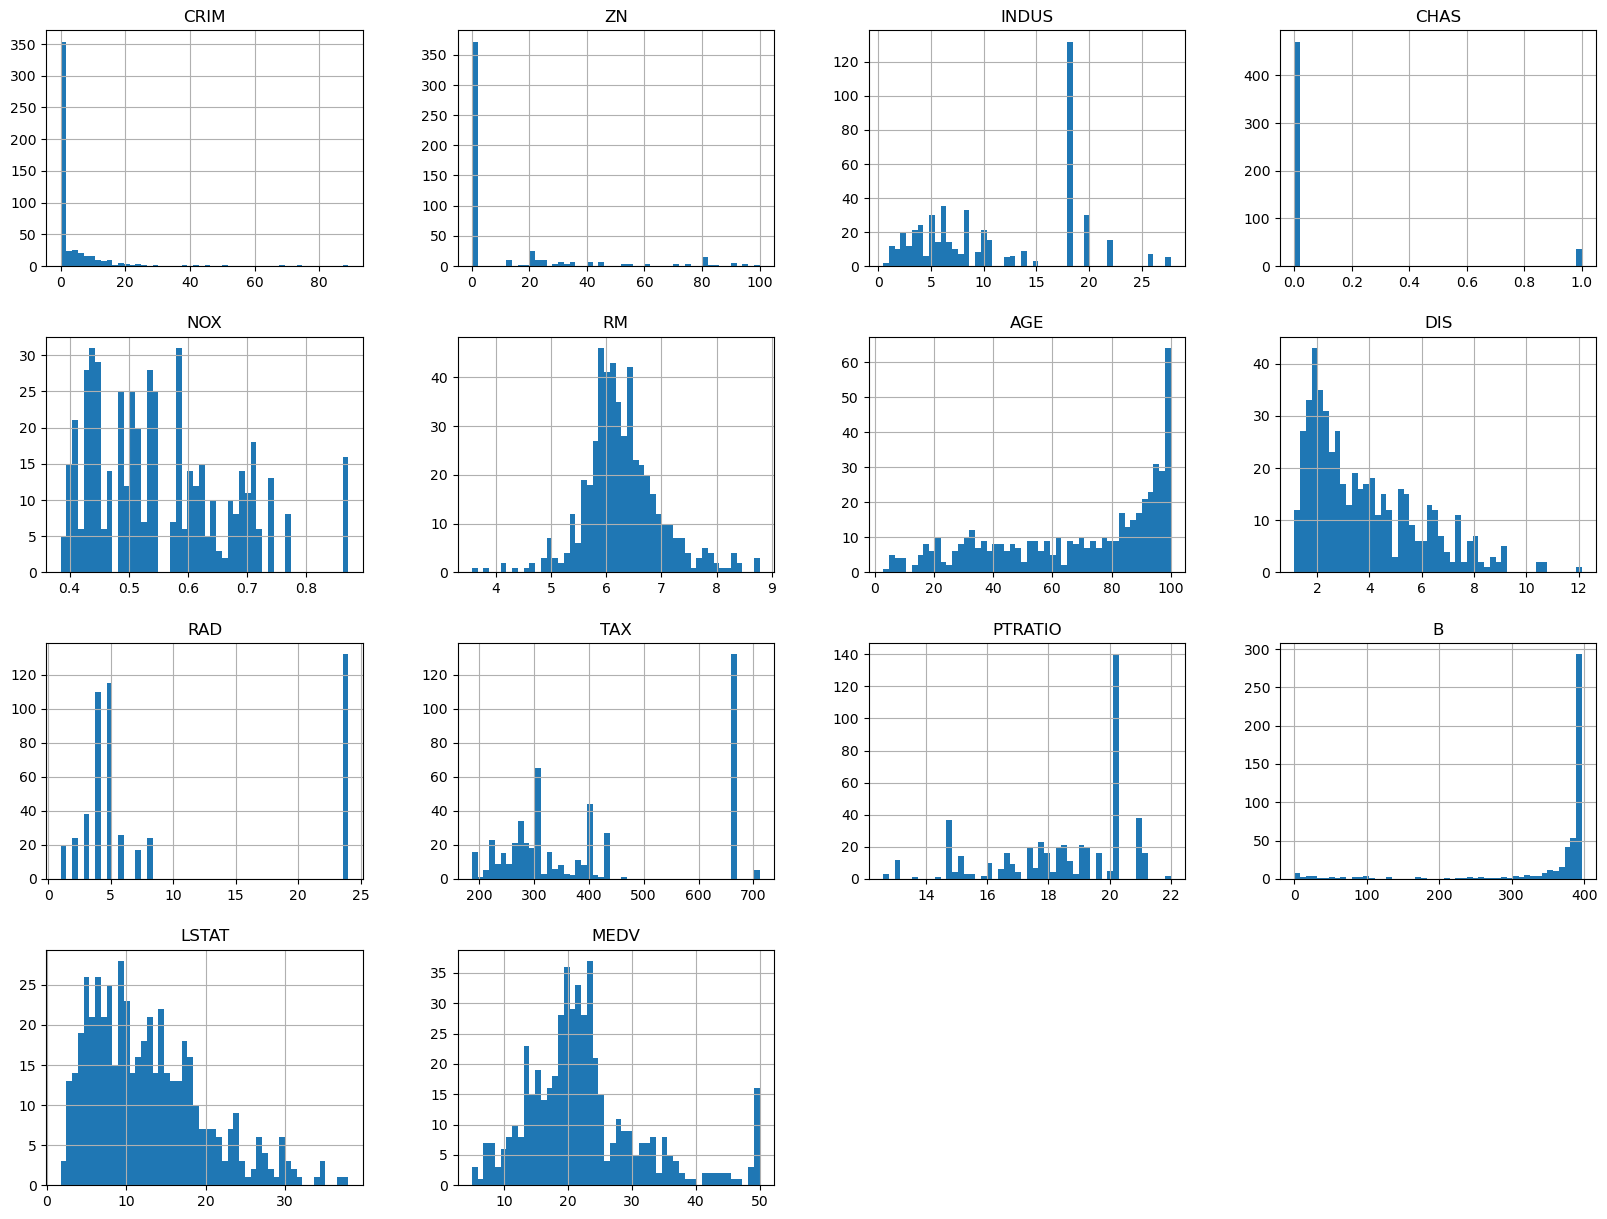

In [10]:
housing.hist(bins=50,figsize=(20,15)) #histogram x axis will tell you the value and y axis will tell you the count on that value
#bins shows how many bars and figsize(width,height);

# Train-Test Spliting

In [13]:
import numpy as np
#for learing purpose
def split_train_test(data,test_ratio):
    
    np.random.seed(42) #it is to fix the problem specified below values are fixed now; you will see by running the program also;
    shuffled = np.random.permutation(len(data)) #shuffling of data  you face a problem that the points in test data you dont want to see but due to suffling there is a chance that they will appear in the training set so you need to solve this problem;
    test_set_size = int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [14]:
#train_set,test_set=split_train_test(housing,0.2)

In [15]:
#print(len(train_set))



In [16]:
#print(len(test_set))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [19]:
print(len(train_set))

404


In [20]:
print(len(test_set))

102


In [21]:
# as we have seen that the values of CHAS are 0 and 1 so there may be the chances of error so we are require to evenly distribute that data between train and test data so we use below code

In [22]:
#evenly distribution of data between train and test data on CHAS consider CHAS as an important features
from sklearn.model_selection import StratifiedShuffleSplit# write stratified press tab you will get the whole function
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42) #n_split is no. of splitting iteration
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    





In [23]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [24]:

strat_test_set['CHAS'].value_counts() # this is how we can evenly distribute our data taking some important features in consederation

0    95
1     7
Name: CHAS, dtype: int64

In [25]:
housing = strat_train_set.copy()

# looking for correlations

In [26]:
corr_matrix=housing.corr() # it is the function in pandas library . Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe

In [27]:
corr_matrix['MEDV'].sort_values(ascending=False) # correlation coffcient means if you increase one value whether other values increases or decreases 
# + means increase - means decrease if rm increase then medv increase ans so  on.

MEDV       1.000000
RM         0.678375
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

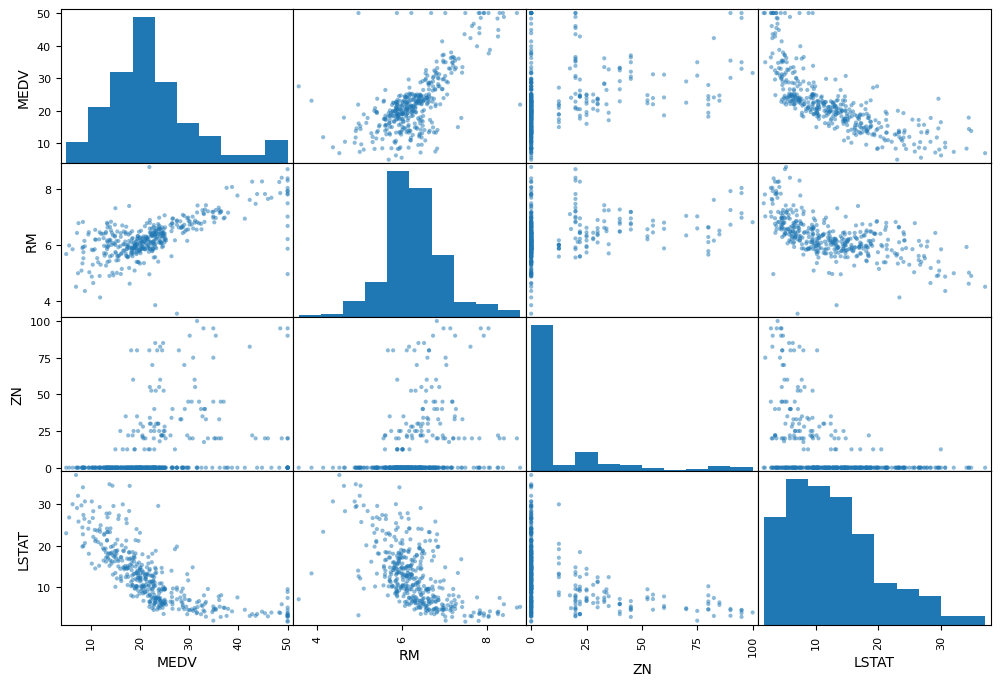

In [28]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8)) # diagonally it shows(histogram) the number of values at particular number that why it is not shown straight line

<Axes: xlabel='RM', ylabel='MEDV'>

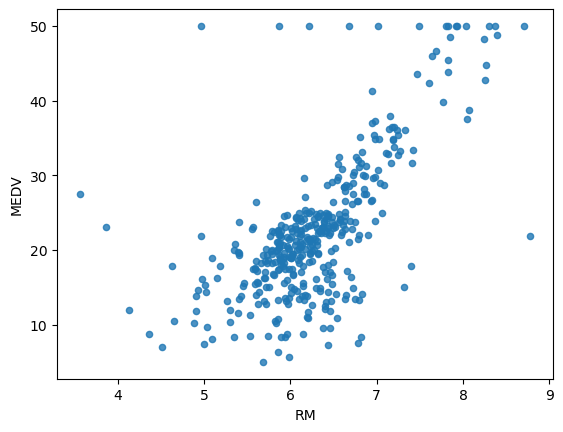

In [29]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8) # there are some blue values straight line type because 50 is the maximum value in the data

# Trying out attribute Combinations

In [30]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [31]:
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [32]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [33]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678375
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527252
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

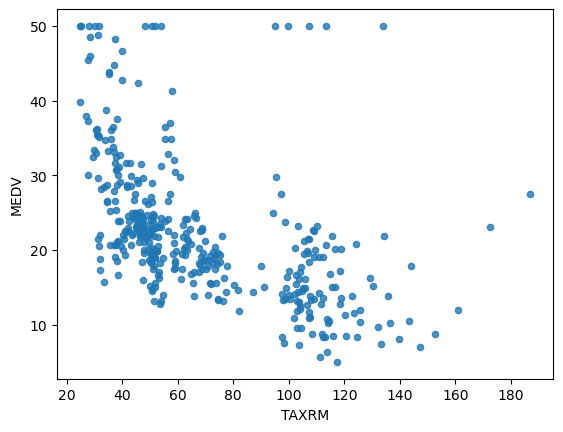

In [34]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [35]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

# Missing Attributes

In [36]:
# to take care of missing attributes , you have three option
# get rid of the missing data points # if more than we cannot do this 
# get rid of the whole attributes (column) # like CHAS has minimum positive value of we can remove that attribute if there are missing entries in the CHAS attributes
# set the value to some value(0,mean, median) # this is the best thing to do in case of missing attributes

In [37]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape
# Note that the original housing dataframe will remain unchanged but if subset=["RM"],inplace = true then housing will get changed

(400, 13)

In [38]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [39]:
median = housing["RM"].median() # Compute median for Option 3

In [40]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [41]:
housing.shape

(404, 13)

In [42]:
housing.describe() #before we started imputer

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279360,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715973,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # this is used to fill  up all missing values not only RM missing values
imputer.fit(housing)

SimpleImputer(strategy='median')

In [44]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [45]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279360,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715973,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [46]:
X = imputer.transform(housing)

In [47]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [48]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278673,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712444,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit Learn 

Primarily, three types of objects

1-Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters and it also sometimes tranform.

2-Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3-Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

Feature Scaling
Primarily, two types of feature scaling methods:

1-Min-max scaling (Normalization) -(value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

2-Standardization -(value - mean)/std Sklearn provides a class called StandardScaler for this

In [49]:
# std is standard deviation 

# Creating the Pipeline

In [50]:
#A machine learning pipeline is used to help automate machine learning workflows. They operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome, whether positive or negative.

In [51]:
# pipeline means write the code such that in future you can easily change your model,strategy,;;


In [52]:
from sklearn.pipeline import Pipeline
#features scaling means you are require to match the values range of different features e.g histogram 0-8 and 0-50 we can match there range with feature scaling
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [53]:
housing_num_tr = my_pipeline.fit_transform(housing) # it will be numpy array because predit with take numpy array as input;

In [54]:
housing_num_tr.shape

(404, 13)


# Selecting the desired model for project

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression() # the error was very high in linearregression model so we take some other model to train our project
#model=DecisionTreeRegressor() # the error is 0 because of overfittig which is not good for health 
model=RandomForestRegressor() # this model show minimum error than all other model and also there is no overfittig problem
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [56]:
some_data=housing.iloc[:5]

In [57]:
some_labels=housing_labels.iloc[:5]

In [58]:
prepared_data=my_pipeline.transform(some_data)

In [59]:
model.predict(prepared_data)

array([22.45 , 25.262, 16.367, 23.278, 23.413])

In [60]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the model

In [61]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [62]:
rmse

1.1948634797115993

# Using Better Evaluation Technique - Cross Validation

In [63]:
#Cross validation means we are require to decrease the error

In [64]:
# 1 2 3 4 5 6 7 8 9 means one by one train with all other points except one point which is used for testing of the data model

In [65]:
# like choose 2....9 for train and 1 for testing and find the error in the model like take other point and do train and testing this is called cross validation technique

In [ ]:
# 1 2 3 4 5 6 7 8 9 10 cv =10 means we require to train test 10 times taking different different data;
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)


In [ ]:
rmse_scores

In [ ]:
def print_scores(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print("standard deviation",scores.std())

In [ ]:
print_scores(rmse_scores)

In [ ]:
#decision tree 
#mean 4.476423885219459
#standard deviation 1.059672892387601
#linear regression
#mean 4.476423885219459
#standard deviation 1.059672892387601
#Random forestregresser
#mean 3.4759529476868734
#standard deviation 0.7268101342995941

# Saving the model

In [ ]:
#joblib is used to save our model
from sklearn.externals import joblib
joblib_file = "Hosing.pkl"  
joblib.dump(model, joblib_file)

# Testing the model

In [ ]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

In [70]:
final_rmse # output is awesome

2.913125637591375

In [71]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.2398574 , -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

# Using the model

In [5]:
from sklearn.externals import joblib
import numpy as np
model=joblib.load('Housing.pkl')


In [9]:
features=np.array([[-0.43942006,  7.12628155, -1.12165014, -0.27288841, -2.42262747,
       -0.9098574 , -1.31238772,  8.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features) #this will predict the prices;

array([21.73])

In [74]:
# 6 feature significantly changes the price